<a href="https://colab.research.google.com/github/aidot-kr/AISecurity/blob/master/4_Pre_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLTK를 활용한 자연어처리

In [22]:
# 단어 토큰화 - split () 함수사용
msg =" 5~9 사이의 의미(Chunk)들로  편리하다. Don't be stop. They'll be got $3.88 in New York. Ph.D 나 AT&T 같은 경우. 19/06/06"
print (msg.split ())

['5~9', '사이의', '의미(Chunk)들로', '편리하다.', "Don't", 'be', 'stop.', "They'll", 'be', 'got', '$3.88', 'in', 'New', 'York.', 'Ph.D', '나', 'AT&T', '같은', '경우.', '19/06/06']


In [23]:
# 단어 토큰화 - nltk의 word_tokenize 활용, 문장부호까지 포함된 단어 기준으로 문장을 토큰화하여 분리함, 축약형 기준으로 분리
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize, TreebankWordTokenizer, wordpunct_tokenize
msg =" 5~9 사이의 의미(Chunk)들로  편리하다. Don't be stop. They'll be got $3.88 in New York. Ph.D 나 AT&T 같은 경우. 19/06/06"
print(word_tokenize(msg))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['5~9', '사이의', '의미', '(', 'Chunk', ')', '들로', '편리하다', '.', 'Do', "n't", 'be', 'stop', '.', 'They', "'ll", 'be', 'got', '$', '3.88', 'in', 'New', 'York', '.', 'Ph.D', '나', 'AT', '&', 'T', '같은', '경우', '.', '19/06/06']


In [24]:
# 단어 토큰화 - nltk의 TreebankWordTokenizer 활용, 문장부호까지 포함된 단어 기준으로 문장을 토큰화하여 분리함
tokenizer = TreebankWordTokenizer()
print(tokenizer.tokenize(msg))

['5~9', '사이의', '의미', '(', 'Chunk', ')', '들로', '편리하다.', 'Do', "n't", 'be', 'stop.', 'They', "'ll", 'be', 'got', '$', '3.88', 'in', 'New', 'York.', 'Ph.D', '나', 'AT', '&', 'T', '같은', '경우.', '19/06/06']


In [25]:
# 단어 토큰화 - nltk의 wordpunct_tokenize 사용, 모든 문장부호를 포함하여 분리함
print(wordpunct_tokenize(msg))

['5', '~', '9', '사이의', '의미', '(', 'Chunk', ')', '들로', '편리하다', '.', 'Don', "'", 't', 'be', 'stop', '.', 'They', "'", 'll', 'be', 'got', '$', '3', '.', '88', 'in', 'New', 'York', '.', 'Ph', '.', 'D', '나', 'AT', '&', 'T', '같은', '경우', '.', '19', '/', '06', '/', '06']


## 단어 토큰화 - nltk의 정규표현식 사용
##  \w+ 는 문자 또는 숫자가 1개 이상인 경우를 인식, 단어들 중심으로 토큰화 수행, 문장부호는 생략됨(ex. (,), j)
## 문장의 부호가 생략되면 해당 의미가 손상되는 경우도 있음 (ex, 5-9 등)

In [26]:
from nltk.tokenize import regexp_tokenize
msg =" 5~9 사이의 의미(Chunk)들로  편리하다. Don't be stop. They'll be got $3.88 in New York. Ph.D 나 AT&T 같은 경우. 19/06/06"
print(regexp_tokenize(msg, pattern='\w+'))

['5', '9', '사이의', '의미', 'Chunk', '들로', '편리하다', 'Don', 't', 'be', 'stop', 'They', 'll', 'be', 'got', '3', '88', 'in', 'New', 'York', 'Ph', 'D', '나', 'AT', 'T', '같은', '경우', '19', '06', '06']


In [27]:
from nltk.tokenize import sent_tokenize
msg =" 5~9 사이는 xx@gmail.com로 전송하면, 관리가 편리하다. They'll be got $3.88 in New York. Ph.D 나 AT&T 같은 경우. 19/06/06"
print(sent_tokenize(msg))

[' 5~9 사이는 xx@gmail.com로 전송하면, 관리가 편리하다.', "They'll be got $3.88 in New York.", 'Ph.D 나 AT&T 같은 경우.', '19/06/06']


# TextBlob 사용한 토큰화
## - words 함수: 단어토큰화, sentences: 문장토큰화
## - sentiment: -1~1사이의 극성(polarity)과 주관성(Subjectivity) 표현(0는 객관적, 1은 주관적)
## 참고URL) https://textblob.readthedocs.io/en/dev/index.html

In [28]:
from textblob import TextBlob

text = '''
It was terrible to read that this film nearly avoided coming to our screens.
Thank goodness they saw that it was a good script, because it become one of the great films of the 1980's.
It wasn't fun!  '''

blob = TextBlob(text) # TextBolob 객체 생성

print(blob.words) # 토큰화(단어) 처리
print('')
print(blob.sentences)  # 토큰화(문장기준) 처리
print('')
for sentence in blob.sentences: 
    print(sentence.sentiment)

['It', 'was', 'terrible', 'to', 'read', 'that', 'this', 'film', 'nearly', 'avoided', 'coming', 'to', 'our', 'screens', 'Thank', 'goodness', 'they', 'saw', 'that', 'it', 'was', 'a', 'good', 'script', 'because', 'it', 'become', 'one', 'of', 'the', 'great', 'films', 'of', 'the', '1980', "'s", 'It', 'was', "n't", 'fun']

[Sentence("
It was terrible to read that this film nearly avoided coming to our screens."), Sentence("Thank goodness they saw that it was a good script, because it become one of the great films of the 1980's."), Sentence("It wasn't fun!")]

Sentiment(polarity=-0.45, subjectivity=0.7)
Sentiment(polarity=0.75, subjectivity=0.675)
Sentiment(polarity=0.375, subjectivity=0.2)


# Keras를 사용한 토큰화
## - 딥러닝에서 NLP를 쉽게 다루기 위한 함수 지원
### 1) 딥러닝 모델은 텍스트 데이터를 직접 입력으로 사용하지 않음
### 2) 딥러닝 모델을 설계할 때 텍스트를 다루기 어려운 부분 존재

## text_to_word_sequence()
- 공백을 기준으로 텍스트를 분할
- 모든 문자를 소문자로 변환
- 문장 부호의 기본 목록은 !”# $ % & () * +,-. / :; <=> ? @ [\] ^ _ {|} ~ \ t \ n

### -참고자료) https://machinelearningmastery.com/prepare-text-data-deep-learning-keras/

In [29]:
from tensorflow.keras.preprocessing.text import *

msg =" 5~9 사이의 의미(Chunk)들로  편리하다. Don't be stop. They'll be got $3.88 in New York. Ph.D 나 AT&T 같은 경우. 19/06/06"
# 주어진 텍스트 토큰화
print(text_to_word_sequence(msg,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' '))


['5', '9', '사이의', '의미', 'chunk', '들로', '편리하다', "don't", 'be', 'stop', "they'll", 'be', 'got', '3', '88', 'in', 'new', 'york', 'ph', 'd', '나', 'at', 't', '같은', '경우', '19', '06', '06']


In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer

texts = ['The cat sat on the mat.',
         'The dog sat on the log.',
         'Dogs and cats living together.']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

print(tokenizer.word_index)
print('')
print(tokenizer.texts_to_matrix(texts))

{'the': 1, 'sat': 2, 'on': 3, 'cat': 4, 'mat': 5, 'dog': 6, 'log': 7, 'dogs': 8, 'and': 9, 'cats': 10, 'living': 11, 'together': 12}

[[0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]]


## n-gram 예제

In [31]:
from nltk.tokenize import word_tokenize

msg = """The future of work is called New Work | Job Wizardsjob-wizards.com › new-work-make...
New Work makes everything new. New worlds of work give us more flexibility, but they also demand it from us – in terms of time, 
location and, above all else, ...
What is New Work? Everything you need to know – Workpathwww.workpath.com › magazine """

tokens = word_tokenize(msg)

# bigram 함수를 이용하여 생성
bgs = nltk.bigrams(tokens)

# 모든 텍스트의 bigrame 빈도를 계산함
fdist = nltk.FreqDist(bgs)
for k,v in fdist.items():
    print(k,v)

('The', 'future') 1
('future', 'of') 1
('of', 'work') 2
('work', 'is') 1
('is', 'called') 1
('called', 'New') 1
('New', 'Work') 3
('Work', '|') 1
('|', 'Job') 1
('Job', 'Wizardsjob-wizards.com') 1
('Wizardsjob-wizards.com', '›') 1
('›', 'new-work-make') 1
('new-work-make', '...') 1
('...', 'New') 1
('Work', 'makes') 1
('makes', 'everything') 1
('everything', 'new') 1
('new', '.') 1
('.', 'New') 1
('New', 'worlds') 1
('worlds', 'of') 1
('work', 'give') 1
('give', 'us') 1
('us', 'more') 1
('more', 'flexibility') 1
('flexibility', ',') 1
(',', 'but') 1
('but', 'they') 1
('they', 'also') 1
('also', 'demand') 1
('demand', 'it') 1
('it', 'from') 1
('from', 'us') 1
('us', '–') 1
('–', 'in') 1
('in', 'terms') 1
('terms', 'of') 1
('of', 'time') 1
('time', ',') 1
(',', 'location') 1
('location', 'and') 1
('and', ',') 1
(',', 'above') 1
('above', 'all') 1
('all', 'else') 1
('else', ',') 1
(',', '...') 1
('...', 'What') 1
('What', 'is') 1
('is', 'New') 1
('Work', '?') 1
('?', 'Everything') 1
('Eve

## n-gram 함수화 정리 (참고용으로 작성)

In [32]:
import operator

from bs4 import BeautifulSoup
def clean_html_tags(text):
    bs = BeautifulSoup(text, "html.parser")
    clean_text = bs.get_text()
    return clean_text


sample_file = clean_html_tags(msg)
 
#어절 n-gram 분석
#sentence: 분석할 문장, num_gram: n-gram 단위
def word_ngram(sentence, num_gram):
  # in the case a file is given, remove escape characters
  sentence = sentence.replace('\n', ' ').replace('\r', ' ')
  text = tuple(sentence.split(' '))
  ngrams = [text[x:x+num_gram] for x in range(0, len(text))]
  return tuple(ngrams)
 
#음절 n-gram 분석
#sentence: 분석할 문장, num_gram: n-gram 단위
def phoneme_ngram(sentence, num_gram):
  text = tuple(sentence) # split the sentence into an array of characters
  ngrams = [text[x:x+num_gram] for x in range(0, len(text))]
  return ngrams
 
#n-gram 빈도 리스트 생성
def make_freqlist(ngrams):
  freqlist = {}
 
  for ngram in ngrams:
    if (ngram in freqlist):
      freqlist[ngram] += 1
    else:
      freqlist[ngram] = 1
   
  return freqlist
 
ngrams = word_ngram(sample_file, 2)
freqlist = make_freqlist(ngrams)
sorted_freqlist = sorted(freqlist.items(), key=operator.itemgetter(1))
print(sorted_freqlist)





[(('The', 'future'), 1), (('future', 'of'), 1), (('work', 'is'), 1), (('is', 'called'), 1), (('called', 'New'), 1), (('Work', '|'), 1), (('|', 'Job'), 1), (('Job', 'Wizardsjob-wizards.com'), 1), (('Wizardsjob-wizards.com', '›'), 1), (('›', 'new-work-make...'), 1), (('new-work-make...', 'New'), 1), (('Work', 'makes'), 1), (('makes', 'everything'), 1), (('everything', 'new.'), 1), (('new.', 'New'), 1), (('New', 'worlds'), 1), (('worlds', 'of'), 1), (('work', 'give'), 1), (('give', 'us'), 1), (('us', 'more'), 1), (('more', 'flexibility,'), 1), (('flexibility,', 'but'), 1), (('but', 'they'), 1), (('they', 'also'), 1), (('also', 'demand'), 1), (('demand', 'it'), 1), (('it', 'from'), 1), (('from', 'us'), 1), (('us', '–'), 1), (('–', 'in'), 1), (('in', 'terms'), 1), (('terms', 'of'), 1), (('of', 'time,'), 1), (('time,', ''), 1), (('', 'location'), 1), (('location', 'and,'), 1), (('and,', 'above'), 1), (('above', 'all'), 1), (('all', 'else,'), 1), (('else,', '...'), 1), (('...', 'What'), 1), (

## HTML Tag 제거

In [33]:
html_text = """<h3 id="4-20페이지까지-크롤링-후-파일로-저장하기">4. 20페이지까지 크롤링 후 파일로 저장하기</h3>
<p>1페이지 크롤링을 완성했습니다.</p>
<pre><code class="language-python"><span class="token keyword">import</span> requests
<span class="token keyword">import</span> pandas <span class="token keyword">as</span> pd
<p> </p>"""

print(clean_html_tags(html_text))

4. 20페이지까지 크롤링 후 파일로 저장하기
1페이지 크롤링을 완성했습니다.
import requests
import pandas as pd
 


## 소문자 변환처리
### - python의 소문자 변환 문자열 메소드

In [34]:
input_str = 'Korea, China, India, United States, Indonesia, and Brazil.'
input_str = input_str.lower()
print(input_str)

korea, china, india, united states, indonesia, and brazil.


## 정규표현식을 활용  http://www.nextree.co.kr/p4327/
### -  숫자과 전화번호 치환
### - 참고자료) http://pythonstudy.xyz/python/article/401-%EC%A0%95%EA%B7%9C-%ED%91%9C%ED%98%84%EC%8B%9D-Regex

In [35]:
import re # 정규 표현식 (Regular Expression) 패키지
input_str = '내일 3시까지 제주·남부 비…최고 30㎜'
result = re.sub(r'\d+', '', input_str) # 모든 1개 이상의 숫자를 찾아서 ''로 치환함
print(result)

phone_str = '관련 문의는 아래로 010-7000-0000으로 전화주세요'
result = re.sub(r'\d\d\d-\d\d\d\d-\d\d\d\d', '연락처', phone_str) # 모든 전화번호를 '연락처'로 변경함
print(result)

내일 시까지 제주·남부 비…최고 ㎜
관련 문의는 아래로 연락처으로 전화주세요


### -  정규표현식을 이용한 이메일, URL, 한글자음/모음, HTML, 문장부호 정제 함수로 적용

In [36]:
def clean_sentense(txt):
    pattern = '(\d\d\d-\d\d\d\d-\d\d\d\d)' # 전화번호 제거 (000-0000-0000),\d: 숫자 1개
    txt = re.sub(pattern=pattern, repl='', string=txt)          
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거, a-z 사이의 문자, 
    txt = re.sub(pattern=pattern, repl='', string=txt)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    txt = re.sub(pattern=pattern, repl='', string=txt)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    txt = re.sub(pattern=pattern, repl='', string=txt)
    pattern = '<[^>]*>'         # HTML 태그 제거
    txt = re.sub(pattern=pattern, repl='', string=txt)
    pattern = '[^\w\s]'         # 특수기호제거
    txt = re.sub(pattern=pattern, repl='', string=txt)
    
    return txt   

txt ='''000-2222-0222 사이의 숫자는 아래의 메일로 kk@naver.com 전송요망 ㅋㅋㅋ ㅏㅏㅏ . Don't be stop. 
They'll be got $3.88 in New York. Ph.D 나 AT&T 같은 경우. 19/06/06'''
print(clean_sentense(txt))

 사이의 숫자는 아래의 메일로  전송요망    Dont be stop 
Theyll be got 388 in New York PhD 나 ATT 같은 경우 190606


# NLTK 패키지
- NLTK(Natural Language Toolkit) 패키지는 교육용으로 개발된 자연어 처리 및 문서 분석용 파이썬 패키지
- 다양한 기능 및 예제를 가지고 있으며 실무 및 연구에서도 많이 사용됨
- 주요 기능: 1) 연구용 말뭉치 2) 토큰화 3) 형태소 분석 4) 품사태깅


## NLTK Book 관련 말뭉치 활용
- NLP 분석에 사용할 수 있는 Sample 문서를 유형별로 제공함
- 참고자료) https://www.nltk.org/book/ch01.html

In [37]:
import nltk
nltk.download("book", quiet=True) #nltk book 의 모든 자료 다운로드
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## FreqDist
- 문서에 사용된 단어(토큰)의 사용빈도 정보를 담는 클래스
- 참고자료) https://datascienceschool.net/view-notebook/8895b16a141749a9bb381007d52721c1/

In [38]:
fdist1 = FreqDist(text5) # 사용빈도 추출
print(fdist1.most_common(50)) # 빈도가 높은 순서로 출력

[('.', 1268), ('JOIN', 1021), ('PART', 1016), ('?', 737), ('lol', 704), ('to', 658), ('i', 648), ('the', 646), ('you', 635), (',', 596), ('I', 576), ('a', 568), ('hi', 546), ('me', 415), ('...', 412), ('is', 372), ('..', 361), ('in', 357), ('ACTION', 346), ('!', 342), ('and', 335), ('it', 332), ('that', 274), ('hey', 264), ('my', 242), ('of', 202), ('u', 200), ("'s", 195), ('for', 188), ('on', 186), ('what', 183), ('here', 181), ('are', 178), ('not', 170), ('....', 170), ('do', 168), ('all', 165), ('have', 164), ('up', 160), ('like', 156), ('no', 155), ('with', 152), ('chat', 142), ('was', 142), ("n't", 141), ('so', 139), ('your', 137), ('/', 133), ("'m", 133), ('good', 130)]


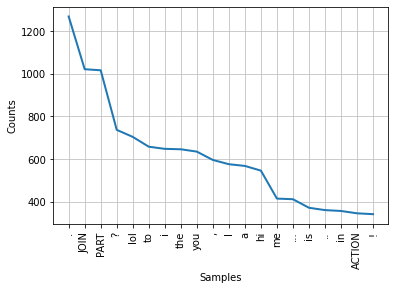

In [39]:
import matplotlib.pyplot as plt

fdist1.plot(20) # 단어의 사용빈도를 간단하게 시각화
plt.show()

## 형태소 분석
- PoS(part-of-speech) 태깅: POS-tagger 는 일련의 단어를 처리하고 각 단어에 품사 태그를 태깅함
- 참고자료) https://www.nltk.org/book/ch05.html

In [40]:
import nltk
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import word_tokenize
text = word_tokenize("And now for something completely different")
nltk.pos_tag(text)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

## 어간 추출(stemming) 
- 변화된 단어의 접미사나 어미를 제거하여 같은 의미를 가지는 형태소의 기본형을 찾는 방법
- ex) -ed,-ize, -s,-de,mis와 같은 형태의 접두사를 제거하는 방식이 사용됨
- Porter stemmer: 1960년대 포터 형태소 분석 알고리즘으로 영어에서는 표준적으로 많이 사용
- LancasterStemmer: 1990년대 제작된 분석기로, 포터에 비해 더 많은 글자의 어미를 제거하는 경향이 있음

In [41]:
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer

st1 = PorterStemmer()
st2 = LancasterStemmer()

words = ['caresses', 'flies', 'dies', 'mules', 'denied','died', 'agreed', 'owned', 'humbled', 'sized',
 'meeting', 'stating', 'siezing', 'itemization',
'sensational', 'traditional', 'reference', 'colonizer',
'plotted', 'production']

print("Porter Stemmer   :", [st1.stem(w) for w in words])
print("Lancaster Stemmer:", [st2.stem(w) for w in words])

Porter Stemmer   : ['caress', 'fli', 'die', 'mule', 'deni', 'die', 'agre', 'own', 'humbl', 'size', 'meet', 'state', 'siez', 'item', 'sensat', 'tradit', 'refer', 'colon', 'plot', 'product']
Lancaster Stemmer: ['caress', 'fli', 'die', 'mul', 'deny', 'died', 'agree', 'own', 'humbl', 'siz', 'meet', 'stat', 'siez', 'item', 'sens', 'tradit', 'ref', 'colon', 'plot', 'produc']


## 표제어 추출(Lemmatization)
- 사전을 활용하여 기본 형태를 추출하기 전에 해당 단어를 확인하여 처리하는 방식
- 단점으로는 사전과의 비교가 진행되므로 속도가 느림
- 어간 추출의 과정에 단어의 의미가 훼손되는 경우가 발생
- ex) 'production'을 어간 추출하는 경우 'produc'와 같은 의미 손상 발생 

In [42]:
import nltk
nltk.download('wordnet') # wordnet을 사전으로 활용하여 비교함

from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

lem = WordNetLemmatizer()
porter = PorterStemmer()

words = ['products', 'comming', 'ran', 'died', 'flies']

print("WordNet Lemmatize:", [lem.lemmatize(w) for w in words])
print("Porter Stemmer:", [porter.stem(w) for w in words])
print("WordNet Lemmatize:", [lem.lemmatize(w, pos="v") for w in words]) # 품사를 지정하는 경우 명확한 복원이 가능

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
WordNet Lemmatize: ['product', 'comming', 'ran', 'died', 'fly']
Porter Stemmer: ['product', 'com', 'ran', 'die', 'fli']
WordNet Lemmatize: ['products', 'comming', 'run', 'die', 'fly']


## NER(Named Entity Recognition)
- 구조화되지 않은 텍스트에서 정보를 추출하는 방식
- 텍스트(사람, 조직, 이벤트 등)에서 실제 개체를 추출
- NLTK의 NER chunk 활용(NE annotator)
- 참고자료) https://nlpforhackers.io/named-entity-extraction/

In [43]:
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')

from nltk import word_tokenize, pos_tag, ne_chunk
 
sentence = "Mark and John are working at Google"
 
print(ne_chunk(pos_tag(word_tokenize(sentence))))

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
(S
  (PERSON Mark/NNP)
  and/CC
  (PERSON John/NNP)
  are/VBP
  working/VBG
  at/IN
  (ORGANIZATION Google/NNP))


In [44]:
from nltk.wsd import lesk
sent = ['I', 'went', 'to', 'the', 'bank', 'to', 'deposit', 'money', '.']
ambiguous = 'bank'
lesk(sent, ambiguous)
lesk(sent, ambiguous).definition()

from nltk.corpus import wordnet as wn

for ss in wn.synsets('bank'):
        print(ss, ss.definition())

"""
print(lesk(sent, 'bank', 'n'))
Synset('savings_bank.n.02')
print(lesk(sent, 'bank'))
Synset('savings_bank.n.02')
"""

Synset('bank.n.01') sloping land (especially the slope beside a body of water)
Synset('depository_financial_institution.n.01') a financial institution that accepts deposits and channels the money into lending activities
Synset('bank.n.03') a long ridge or pile
Synset('bank.n.04') an arrangement of similar objects in a row or in tiers
Synset('bank.n.05') a supply or stock held in reserve for future use (especially in emergencies)
Synset('bank.n.06') the funds held by a gambling house or the dealer in some gambling games
Synset('bank.n.07') a slope in the turn of a road or track; the outside is higher than the inside in order to reduce the effects of centrifugal force
Synset('savings_bank.n.02') a container (usually with a slot in the top) for keeping money at home
Synset('bank.n.09') a building in which the business of banking transacted
Synset('bank.n.10') a flight maneuver; aircraft tips laterally about its longitudinal axis (especially in turning)
Synset('bank.v.01') tip laterally
Sy

"\nprint(lesk(sent, 'bank', 'n'))\nSynset('savings_bank.n.02')\nprint(lesk(sent, 'bank'))\nSynset('savings_bank.n.02')\n"

## KoNLPy 패키지
- MeCab Class
- MeCab 원래 교토대학에서 개발된 일본어 형태소 분석기로 Eunjeon 프로젝트에 의해 한국어로 변경 적용됨

In [9]:
## MeCab 설치

!pip install konlpy

In [10]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip3 install JPype1-py3

In [11]:
import os
os.chdir('/tmp/')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.1.tar.gz
!tar zxfv mecab-0.996-ko-0.9.1.tar.gz
os.chdir('/tmp/mecab-0.996-ko-0.9.1')
!./configure
!make
!make check
!make install

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1380k  100 1380k    0     0  1047k      0  0:00:01  0:00:01 --:--:--  9.8M
mecab-0.996-ko-0.9.1/
mecab-0.996-ko-0.9.1/config.h.in
mecab-0.996-ko-0.9.1/Makefile.train
mecab-0.996-ko-0.9.1/ChangeLog
mecab-0.996-ko-0.9.1/configure
mecab-0.996-ko-0.9.1/swig/
mecab-0.996-ko-0.9.1/swig/version.h.in
mecab-0.996-ko-0.9.1/swig/Makefile
mecab-0.996-ko-0.9.1/swig/version.h
mecab-0.996-ko-0.9.1/swig/MeCab.i
mecab-0.996-ko-0.9.1/mkinstalldirs
mecab-0.996-ko-0.9.1/mecab-config.in
mecab-0.996-ko-0.9.1/configure.in
mecab-0.996-ko-0.9.1/mecab.iss.in
mecab-0.996-ko-0.9.1/aclocal.m4
mecab-0.996-ko-0.9.1/mecabrc.in
mecab-0.996-ko-0.9.1/INSTALL
mecab-0.996-ko-0.9.1/AUTHORS
mecab-0.996-ko-0.9.1/example/
mecab-0.996-ko-0.9.1/example/example_lattice.c
mecab-0.996-ko-0.9.1/

In [12]:
os.chdir('/tmp')
!curl -LO http://ftpmirror.gnu.org/automake/automake-1.11.tar.gz
!tar -zxvf automake-1.11.tar.gz
os.chdir('/tmp/automake-1.11')
!./configure
!make
!make install

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1339k  100 1339k    0     0   587k      0  0:00:02  0:00:02 --:--:--  802k
automake-1.11/
automake-1.11/THANKS
automake-1.11/ChangeLog.03
automake-1.11/automake.in
automake-1.11/ChangeLog.96
automake-1.11/ChangeLog.98
automake-1.11/m4/
automake-1.11/m4/gcj.m4
automake-1.11/m4/missing.m4
automake-1.11/m4/runlog.m4
automake-1.11/m4/lex.m4
automake-1.11/m4/vala.m4
automake-1.11/m4/obsol-gt.m4
automake-1.11/m4/obsol-lt.m4
automake-1.11/m4/minuso.m4
automake-1.11/m4/ccstdc.m4
automake-1.11/m4/install-sh.m4
automake-1.11/m4/upc.m4
automake-1.11/m4/sanity.m4
automake-1.11/m4/amversion.m4
automake-1.11/m4/make.m4
automake-1.11/m4/auxdir.m4
automake-1.11/m4/options.m4
automake-1.11/m4/lispdir.m4
automake-1.11/m4/Makefile.am
automake-1.11/m4/dirlist
automake-

In [ ]:
import konlpy
from konlpy.tag import Mecab
mecab = Mecab()

print(mecab.morphs(u'영등포구청역에 있는 맛집 좀 알려주세요.')) # 형태소 추출
print(mecab.nouns(u'우리나라에는 무릎 치료를 잘하는 정형외과가 없는가!'))
print(mecab.pos(u'자연주의 쇼핑몰은 어떤 곳인가?'))

- Hannanum Class

In [ ]:
!apt-get update

!apt-get install g++ openjdk-8-jdk python-dev python3-dev

!pip3 install JPype1-py3

!pip3 install konlpy

!JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"

In [ ]:
# 1) 런타임 초기화 2) 현재 코드 실행
# ------------------------------

!apt-get update
!apt-get install g++ openjdk-8-jdk python-dev python3-dev
!pip3 install JPype1-py3
!pip3 install konlpy
!JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"

# 2. jpype 정상실행 확인
# ------------------------------
import jpype
print(jpype.isJVMStarted()) #return False:not running or 0:running

In [3]:
from konlpy.tag import Okt, Komoran, Hannanum, Kkma , Mecab

#from konlpy.tag import Hannanum
hannanum = Hannanum()
print(hannanum.analyze(u'롯데마트의 흑마늘 양념 치킨이 논란이 되고 있다.'))
print(hannanum.morphs(u'롯데마트의 흑마늘 양념 치킨이 논란이 되고 있다.')) #형태소 추출
print(hannanum.nouns(u'롯데마트의 흑마늘 양념 치킨이 논란이 되고 있다.')) #명사 추출
print(hannanum.pos(u'롯데마트의 흑마늘 양념 치킨이 논란이 되고 있다.')) # 태그 분석 추가

[[[('롯데마트', 'ncn'), ('의', 'jcm')], [('롯데마트의', 'ncn')], [('롯데마트', 'nqq'), ('의', 'jcm')], [('롯데마트의', 'nqq')]], [[('흑마늘', 'ncn')], [('흑마늘', 'nqq')]], [[('양념', 'ncn')]], [[('치킨', 'ncn'), ('이', 'jcc')], [('치킨', 'ncn'), ('이', 'jcs')], [('치킨', 'ncn'), ('이', 'ncn')]], [[('논란', 'ncpa'), ('이', 'jcc')], [('논란', 'ncpa'), ('이', 'jcs')], [('논란', 'ncpa'), ('이', 'ncn')]], [[('되', 'nbu'), ('고', 'jcj')], [('되', 'nbu'), ('이', 'jp'), ('고', 'ecc')], [('되', 'nbu'), ('이', 'jp'), ('고', 'ecs')], [('되', 'nbu'), ('이', 'jp'), ('고', 'ecx')], [('되', 'paa'), ('고', 'ecc')], [('되', 'paa'), ('고', 'ecs')], [('되', 'paa'), ('고', 'ecx')], [('되', 'pvg'), ('고', 'ecc')], [('되', 'pvg'), ('고', 'ecs')], [('되', 'pvg'), ('고', 'ecx')], [('되', 'px'), ('고', 'ecc')], [('되', 'px'), ('고', 'ecs')], [('되', 'px'), ('고', 'ecx')]], [[('있', 'paa'), ('다', 'ef')], [('있', 'px'), ('다', 'ef')]], [[('.', 'sf')], [('.', 'sy')]]]
['롯데마트', '의', '흑마늘', '양념', '치킨', '이', '논란', '이', '되', '고', '있', '다', '.']
['롯데마트', '흑마늘', '양념', '치킨', '논란']
[('롯데마트', 'N')

- Kkma Class

In [4]:
from konlpy.tag import Kkma
kkma = Kkma()
print(kkma.sentences(u'그래도 계속 공부합니다. 재밌으니까!'))
print(kkma.morphs(u'롯데마트의 흑마늘 양념 치킨이 논란이 되고 있다.'))
print(kkma.nouns(u'롯데마트의 흑마늘 양념 치킨이 논란이 되고 있다.'))
print(kkma.pos(u'롯데마트의 흑마늘 양념 치킨이 논란이 되고 있다.'))

['그래도 계속 공부합니다.', '재밌으니까!']
['롯데', '마트', '의', '흑', '마늘', '양념', '치킨', '이', '논란', '이', '되', '고', '있', '다', '.']
['롯데', '롯데마트', '마트', '흑', '흑마늘', '마늘', '양념', '치킨', '논란']
[('롯데', 'NNP'), ('마트', 'NNG'), ('의', 'JKG'), ('흑', 'NNG'), ('마늘', 'NNG'), ('양념', 'NNG'), ('치킨', 'NNG'), ('이', 'JKS'), ('논란', 'NNG'), ('이', 'JKC'), ('되', 'VV'), ('고', 'ECE'), ('있', 'VXV'), ('다', 'EFN'), ('.', 'SF')]


- Komoran Class

In [5]:
from konlpy.tag import Komoran
komoran = Komoran(userdic='dic.txt')
print(komoran.morphs(u'우왕 코모란도 오픈소스가 되었어요'))
print(komoran.nouns(u'오픈소스에 관심 많은 멋진 개발자님들!'))
print(komoran.pos(u'혹시 바람과 함께 사라지다 봤어?'))

['우왕', '코', '모란', '도', '오픈', '소스', '가', '되', '었', '어요']
['오픈', '소스', '관심', '개발자']
[('혹시', 'MAG'), ('바람과 함께 사라지다', 'NNP'), ('보', 'VV'), ('았', 'EP'), ('어', 'EF'), ('?', 'SF')]


- Okt Class
- 참고자료) https://github.com/open-korean-text/open-korean-text

In [6]:
from konlpy.tag import Okt
okt = Okt()
print(okt.morphs(u'단독입찰보다 복수입찰의 경우'))
print(okt.nouns(u'유일하게 항공기 체계 종합개발 경험을 갖고 있는 KAI는'))
print(okt.phrases(u'날카로운 분석과 신뢰감 있는 진행으로'))
print(okt.pos(u'이것도 되나욬ㅋㅋ'))
print(okt.pos(u'이것도 되나욬ㅋㅋ', norm=True))
print(okt.pos(u'이것도 되나욬ㅋㅋ', norm=True, stem=True))

['단독', '입찰', '보다', '복수', '입찰', '의', '경우']
['항공기', '체계', '종합', '개발', '경험']
['날카로운 분석', '날카로운 분석과 신뢰감', '날카로운 분석과 신뢰감 있는 진행', '분석', '신뢰', '진행']
[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('되나욬', 'Noun'), ('ㅋㅋ', 'KoreanParticle')]
[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('되나요', 'Verb'), ('ㅋㅋ', 'KoreanParticle')]
[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('되다', 'Verb'), ('ㅋㅋ', 'KoreanParticle')]


## 형태소 분석기 성능비교

In [15]:
text = "아버지가방에들어가신다"
print(hannanum.pos(text))
print(kkma.pos(text))
print(komoran.pos(text))
print(okt.pos(text))
#print(mecab.pos(text))

[('아버지가방에들어가', 'N'), ('이', 'J'), ('시ㄴ다', 'E')]
[('아버지', 'NNG'), ('가방', 'NNG'), ('에', 'JKM'), ('들어가', 'VV'), ('시', 'EPH'), ('ㄴ다', 'EFN')]
[('아버지', 'NNG'), ('가방', 'NNP'), ('에', 'JKB'), ('들어가', 'VV'), ('시', 'EP'), ('ㄴ다', 'EC')]
[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]


In [14]:
text = "아버지가스타벅스에가신다"
print(hannanum.pos(text))
print(kkma.pos(text))
print(komoran.pos(text))
print(okt.pos(text))
#print(mecab.pos(text))

[('아버지가스타벅스에가', 'N'), ('이', 'J'), ('시ㄴ다', 'E')]
[('아버지', 'NNG'), ('가', 'JKS'), ('스타', 'NNG'), ('벅스에', 'UN'), ('가시', 'VV'), ('ㄴ다', 'EFN')]
[('아버지', 'NNG'), ('가', 'NNG'), ('스타벅스', 'NNP'), ('에', 'JKB'), ('가시', 'VV'), ('ㄴ다', 'EC')]
[('아버지', 'Noun'), ('가', 'Josa'), ('스타벅스', 'Noun'), ('에가', 'Josa'), ('신다', 'Verb')]
